# Neural Network

In [1]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import calendar
from pathlib import Path
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from dateutil.parser import parse

%matplotlib inline

## Using a Single Neuron for Binary Classification

### Step 1 - Import Stock and Social Media data

In [2]:
# Import stock data from .csv file
CEI_df = pd.read_csv(
    Path("../Resources/CEI_data.csv"), 
    delimiter=",",
    index_col = "time",
    parse_dates =True,
    infer_datetime_format =True
    )
# convert datetime
# CEI_df.index = CEI_df.index.astype('datetime64[ns]')
# CEI_df.index.apply(lambda x: x.replace(tzinfo=None))
CEI_df['date'] = CEI_df.index.tz_convert(None).astype(str)
CEI_df['date'] = CEI_df['date'].str.slice(0, 10)
CEI_df.head()

,open,high,low,close,volume,date
time,,,,,,
2021-08-02 00:00:00-04:00,0.4550,0.4550,0.4424,0.445000,7345080,2021-08-02
2021-08-03 00:00:00-04:00,0.4500,0.4650,0.4350,0.457000,9595956,2021-08-03
2021-08-04 00:00:00-04:00,0.4466,0.5000,0.4425,0.497900,42042789,2021-08-04
2021-08-05 00:00:00-04:00,0.4835,0.5191,0.4661,0.474500,35832915,2021-08-05
2021-08-06 00:00:00-04:00,0.4747,0.4760,0.4555,0.460001,10307699,2021-08-06


In [3]:
# Import social media data from .csv file
SM_df = pd.read_csv(
    Path("../Resources/reddit_data.csv"), 
    delimiter=",",
    index_col = "date",
    parse_dates =True,
    infer_datetime_format =True
    )
# Convert datetime
SM_df['date'] = SM_df.index.astype(str)
SM_df['date'] = SM_df['date'].str.slice(0, 10)
SM_df

,title,selftext,score,num_comments,date
date,,,,,
2021-10-02 01:43:23+00:00,"I have no DD. It’s a cheap price, the stock ha...",NaN,1,0,2021-10-02
2021-10-02 01:08:40+00:00,Who is in PED? It is an energy stock! I am in ...,\nToday it had a run. It is an energy stock. H...,1,0,2021-10-02
2021-10-01 20:45:15+00:00,"WHO IS KNOWN FOR CARBON CAPTURE,OH YES. $CEI",NaN,1,0,2021-10-01
2021-10-01 19:21:32+00:00,$PROG - The Next Big Short Squeeze Candidate,"Alright retards, I can't believe I happened up...",1,0,2021-10-01
2021-10-01 18:26:46+00:00,CEI 100% PORT YOLO GAIN HODL TILL 10$+ then 20$,NaN,1,0,2021-10-01
...,...,...,...,...,...
2018-09-24 21:10:24+00:00,CEI too the moon,100%+ returns today what do you guys think?\n\...,1,0,2018-09-24
2018-02-28 20:04:11+00:00,The cheapest thing on Robinhood currently is [...,[removed],21,37,2018-02-28
2017-11-22 16:34:32+00:00,BUY CEI U WILL 9X TIMES INCREASE UR MONEY$$$ h...,[removed],1,0,2017-11-22


In [4]:
# Group the thread and count / sum value by date
grouped_df = SM_df.groupby(SM_df['date']) 
NewSM_df = grouped_df[['score', 'num_comments']].agg('sum')
NewSM_df['thread_volume'] = grouped_df.size()
NewSM_df

,score,num_comments,thread_volume
date,,,
2017-10-06,7,13,1
2017-11-21,1,0,1
2017-11-22,1,0,1
2018-02-28,21,37,1
2018-09-24,1,0,1
...,...,...,...
2021-09-28,30,62,30
2021-09-29,54,119,53
2021-09-30,20,248,20


Text(0.5, 1.0, 'Reddit Thread Volume')

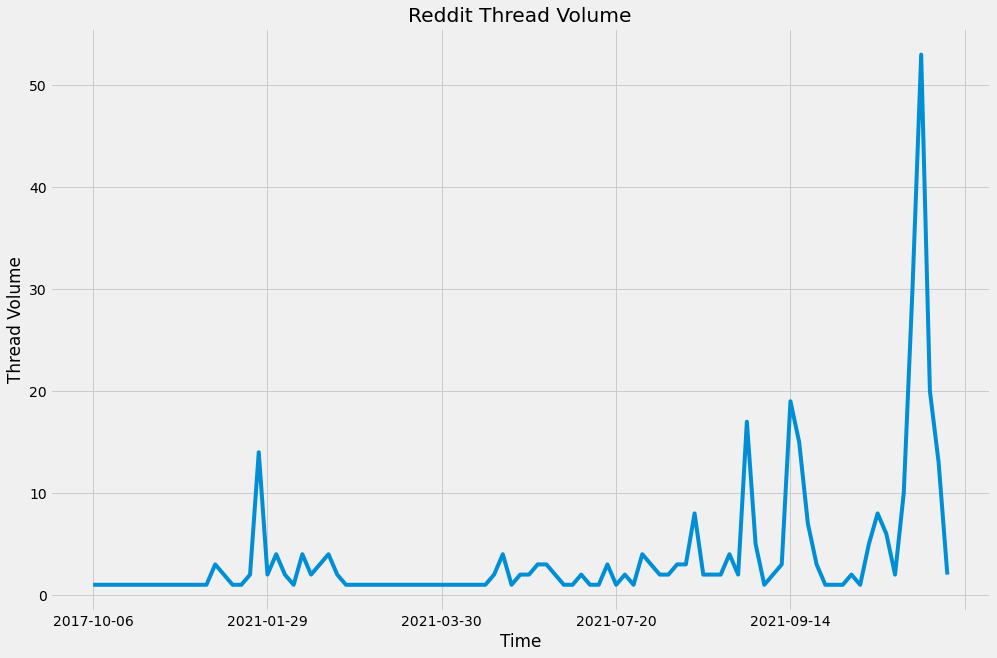

In [5]:
# Evalulate frequency of Reddit Thread each day
matplotlib.style.use('fivethirtyeight')
NewSM_df['thread_volume'].plot(figsize=(15, 10))
plt.xlabel("Time")
plt.ylabel("Thread Volume") 
plt.title("Reddit Thread Volume")

In [6]:
# Merge stock and social media dataframe
df = pd.merge(CEI_df, NewSM_df, how="left", on=['date'])
df = df.fillna(0)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df

,open,high,low,close,volume,score,num_comments,thread_volume
date,,,,,,,,
2021-08-02,0.4550,0.4550,0.4424,0.445000,7345080,0.0,0.0,0.0
2021-08-03,0.4500,0.4650,0.4350,0.457000,9595956,0.0,0.0,0.0
2021-08-04,0.4466,0.5000,0.4425,0.497900,42042789,0.0,0.0,0.0
2021-08-05,0.4835,0.5191,0.4661,0.474500,35832915,0.0,0.0,0.0
2021-08-06,0.4747,0.4760,0.4555,0.460001,10307699,0.0,0.0,0.0
2021-08-09,0.4720,0.4851,0.4608,0.480200,18382066,0.0,0.0,0.0
2021-08-10,0.4831,0.4875,0.4650,0.479500,8611522,0.0,0.0,0.0
2021-08-11,0.4700,0.4725,0.4600,0.468300,7732846,0.0,0.0,0.0
2021-08-12,0.4697,0.4700,0.4401,0.447500,7738982,0.0,0.0,0.0


In [7]:
# Export dataframe to .csv file
df.to_csv(Path('../Resources/CEIandReddit_data.csv'))

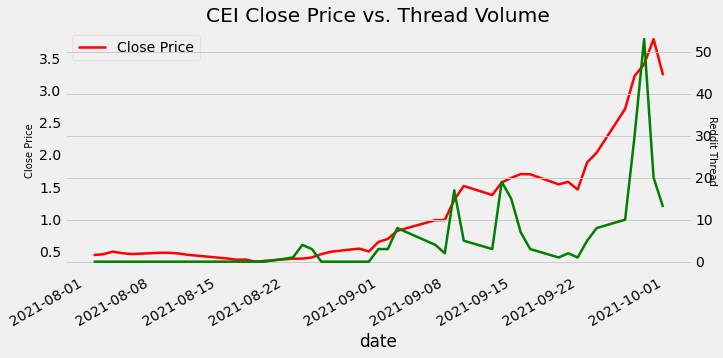

In [8]:
# Plot graph of Close Price vs. Thread count
fig, ax = plt.subplots()
df['close'].plot(figsize=(10, 5), ax=ax, color='r', linewidth=2.5, label='Close Price')
df['thread_volume'].plot(secondary_y=True, ax=ax, color='g', linewidth=2.5, label='Thread Volume')
ax.set_ylabel('Close Price', fontsize=10);

plt.xlabel('Date', fontsize=10)
plt.xticks(rotation=45)
plt.ylabel('Reddit Thread', fontsize=10, rotation=-90)
plt.title('CEI Close Price vs. Thread Volume')
ax.legend()

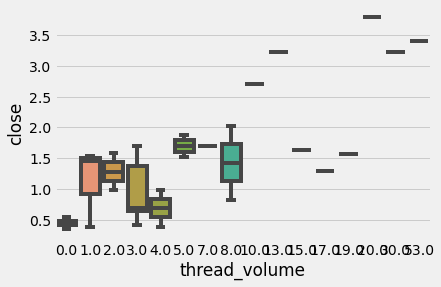

In [9]:
sns.boxplot(x=df['thread_volume'],y=df['close'],data=df)
plt.show()

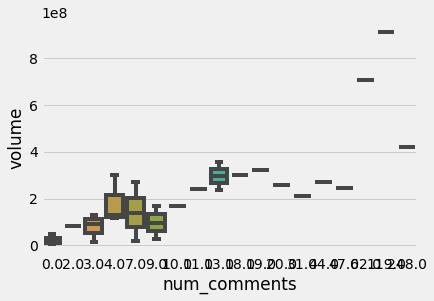

In [10]:
sns.boxplot(x=df['num_comments'],y=df['volume'],data=df)
plt.show()

In [9]:
# Generate input features
cols_to_calc_change = ['open','high','low','volume','close']
windows_back_to_calc = [1]

for days in windows_back_to_calc:
    for col in cols_to_calc_change:    
        Change_ndayago = ['Null']*days
        for i in range(len(df)-days):
            Change_ndayago.append(df[f'{col}'][i+days]/df[f'{col}'][i+days-1])
        df[f'{col}Change'] = Change_ndayago

df.replace(["NaN", 'Null'], np.nan, inplace = True)
df = df.dropna()
df.head(30)

,open,high,low,close,volume,score,num_comments,thread_volume,openChange,highChange,lowChange,volumeChange,closeChange
date,,,,,,,,,,,,,
2021-08-03,0.4500,0.4650,0.4350,0.457000,9595956,0.0,0.0,0.0,0.989011,1.021978,0.983273,1.306447,1.026966
2021-08-04,0.4466,0.5000,0.4425,0.497900,42042789,0.0,0.0,0.0,0.992444,1.075269,1.017241,4.381303,1.089497
2021-08-05,0.4835,0.5191,0.4661,0.474500,35832915,0.0,0.0,0.0,1.082624,1.038200,1.053333,0.852296,0.953003
2021-08-06,0.4747,0.4760,0.4555,0.460001,10307699,0.0,0.0,0.0,0.981799,0.916972,0.977258,0.287660,0.969444
2021-08-09,0.4720,0.4851,0.4608,0.480200,18382066,0.0,0.0,0.0,0.994312,1.019118,1.011636,1.783334,1.043911
2021-08-10,0.4831,0.4875,0.4650,0.479500,8611522,0.0,0.0,0.0,1.023517,1.004947,1.009115,0.468474,0.998542
2021-08-11,0.4700,0.4725,0.4600,0.468300,7732846,0.0,0.0,0.0,0.972883,0.969231,0.989247,0.897965,0.976642
2021-08-12,0.4697,0.4700,0.4401,0.447500,7738982,0.0,0.0,0.0,0.999362,0.994709,0.956739,1.000793,0.955584
2021-08-13,0.4495,0.4495,0.4320,0.433949,8580468,0.0,0.0,0.0,0.956994,0.956383,0.981595,1.108733,0.969718


### Step 2 - Encoded Data

In [10]:
# Split target column from dataset
y = df['close']
X = df.drop(['open','high','low','volume','close'],axis=1)

X

,score,num_comments,thread_volume,openChange,highChange,lowChange,volumeChange,closeChange
date,,,,,,,,
2021-08-03,0.0,0.0,0.0,0.989011,1.021978,0.983273,1.306447,1.026966
2021-08-04,0.0,0.0,0.0,0.992444,1.075269,1.017241,4.381303,1.089497
2021-08-05,0.0,0.0,0.0,1.082624,1.038200,1.053333,0.852296,0.953003
2021-08-06,0.0,0.0,0.0,0.981799,0.916972,0.977258,0.287660,0.969444
2021-08-09,0.0,0.0,0.0,0.994312,1.019118,1.011636,1.783334,1.043911
2021-08-10,0.0,0.0,0.0,1.023517,1.004947,1.009115,0.468474,0.998542
2021-08-11,0.0,0.0,0.0,0.972883,0.969231,0.989247,0.897965,0.976642
2021-08-12,0.0,0.0,0.0,0.999362,0.994709,0.956739,1.000793,0.955584
2021-08-13,0.0,0.0,0.0,0.956994,0.956383,0.981595,1.108733,0.969718


### Step 3 - Scaling Data

In [11]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=52)

### Step 4 - Linear Regression

#### Fit the Model

In [12]:
# Fit Linear Regression Model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_predictions = lr.predict(X_test)
lr_predictions_train = lr.predict(X_train)

for i in range(len(lr_predictions)):
    #price can't be negative
    if lr_predictions[i] < 0:
        lr_predictions[i] = 0

#### Evaluate the Model

In [13]:
# Evaluate the model
from sklearn.metrics import mean_squared_error

new_model = LinearRegression().fit(X_train,y_train.values.reshape((-1, 1)))
print(f'MSE: {mean_squared_error(y_test,lr_predictions)}')
print(f'Training R-squared: {lr.score(X_train,y_train)}')
print(f'Testing R-squared: {lr.score(X_test,y_test)}')
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)
print('predicted response:', lr_predictions, sep='\n')

MSE: 0.26953721523004076
Training R-squared: 0.7643736129294019
Testing R-squared: -0.14570366239661747
intercept: 0.9984419483084712
slope: [-7.74548090e-01 -1.00217487e-03  8.74399970e-01  1.32336398e+00
 -4.67463230e+00 -7.62876898e-01 -2.85114084e-03  3.81947311e+00]
predicted response:
[0.96763051 0.46460317 0.8611071  0.72814841 0.74597046 1.12388059
 0.94497122 1.70827918 0.65810259 0.69852097 2.30232334]


C:\Anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(4.810000000000002, 0.5, 'Predicted Y')

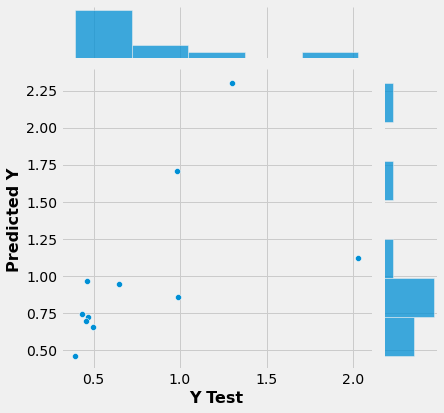

In [14]:
p = sns.jointplot(y_test, lr_predictions)
p.set_axis_labels('x', 'y', fontsize=16)
p.ax_joint.set_xlabel('Y Test', fontweight='bold')
p.ax_joint.set_ylabel('Predicted Y', fontweight='bold')

### Step 5 - Prediction

Text(0.5, 1.0, 'Stock Price Prediction')

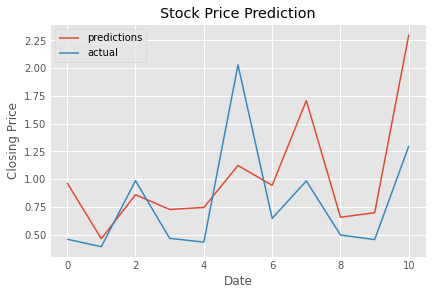

In [26]:
# Making predictions testing X
results = pd.DataFrame({"predictions": lr_predictions.ravel(), "actual": y_test.ravel()})
results.head(10)

# Plot the CEI stock closing price Actual vs. Prediction
matplotlib.style.use('ggplot')
results.plot(linewidth=1.5)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Price Prediction")


Text(0.5, 1.0, 'Stock Price Prediction')

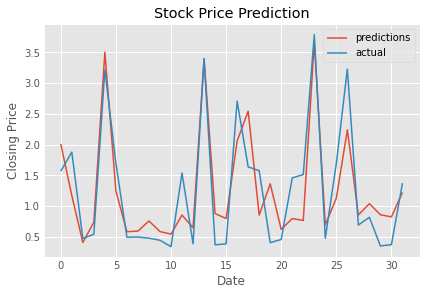

In [25]:
# Making predictions training X
results = pd.DataFrame({"predictions": lr_predictions_train.ravel(), "actual": y_train.ravel()})
results.head(10)

# Plot the CEI stock closing price Actual vs. Prediction
matplotlib.style.use('ggplot')
results.plot(linewidth=1.5)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Price Prediction")

In [30]:
# Create columns to store prediction results
lr1 = LinearRegression()
lr1.fit(X,y)
lr1_predictions = lr1.predict(X)

# Evaluate the model
print(f'MSE: {mean_squared_error(y_test,lr_predictions)}')
print(f'Testing R-squared: {lr1.score(X,y)}')

# Create columns to store prediction value
df['predicted'] = lr1_predictions

MSE: 0.26953721523004076
Testing R-squared: 0.7347345685016557


C:\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


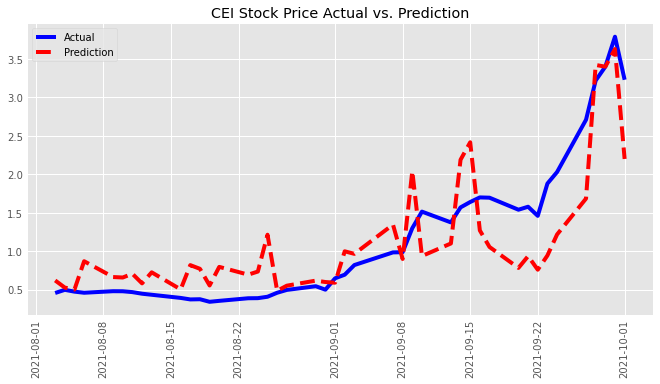

In [28]:
# Plot the line chart actual vs. prediction
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(y, color='blue', label='Actual');
ax.plot(df['predicted'], linestyle='--', color='red', label="Prediction");
ax.legend();
plt.xticks(rotation=90);
ax.set_title('CEI Stock Price Actual vs. Prediction');

In [13]:
# Export dataframe to .csv file

df.to_csv(Path('../Resources/CEIandReddit_data.csv'))